In [1]:
import matplotlib.pyplot as plt
import numpy as np
import phate
import random
import scipy as sp
import scprep
import sys

from sklearn.neighbors import NearestNeighbors


In [2]:
tree, branches = phate.tree.gen_dla(
    n_dim = 100, n_branch = 4, branch_length = 300, rand_multiplier = 2, seed=37, sigma = 5
)
print(tree.shape, branches.shape)

(1200, 100) (1200,)


In [3]:
data = tree
data.shape

(1200, 100)

In [4]:
phate_op = phate.PHATE()
data_ph = phate_op.fit_transform(tree)

Calculating PHATE...
  Running PHATE on 1200 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.22 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.24 seconds.
  Calculating optimal t...
    Automatically selected t = 11
  Calculated optimal t in 1.55 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.19 seconds.
Calculated PHATE in 4.29 seconds.


/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


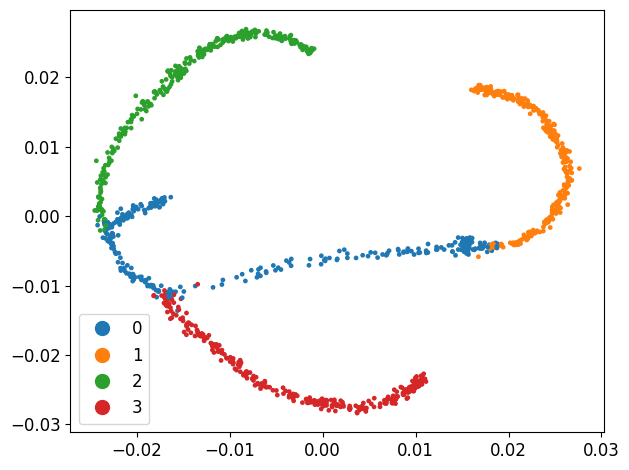

In [5]:
ax = scprep.plot.scatter2d(data_ph, c=branches)

In [6]:
import seaborn as sns

<Axes: >

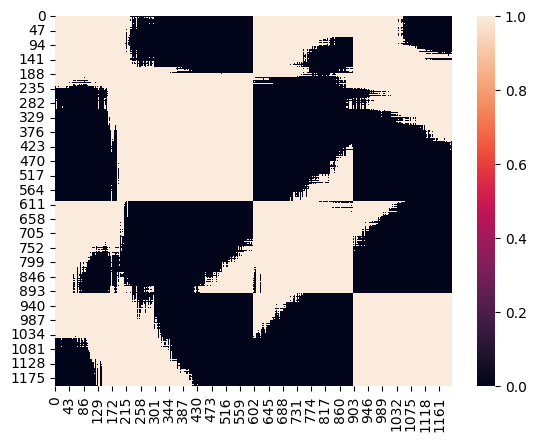

In [54]:
Z = data_ph
paird = sp.spatial.distance.cdist(Z, Z)
cutoff = np.percentile(paird, 50)
# cutoff = 0.04
t_rows, t_cols = np.where(paird >= cutoff)
f_rows, f_cols = np.where(paird < cutoff)
paird[t_rows, t_cols] = False
paird[f_rows, f_cols] = True 
sns.heatmap(paird)

<Axes: ylabel='Count'>

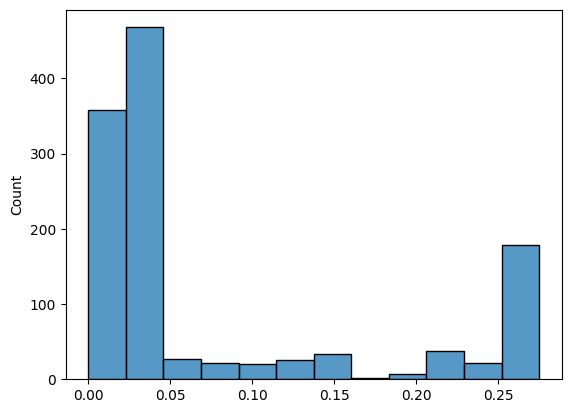

In [55]:
max_dist_n = 1200
sub_dist_n = 10
__s = 1

ps = paird.argsort(axis=1)
Y = ps[:, :max_dist_n][:, ::-1][:, :sub_dist_n]

stds = np.std(paird.take(Y[Y]).mean(axis=1), axis=1)
# stds = np.std(paird.take(Y[Y]), axis=1)

bools = stds > np.percentile(stds, 100 - __s)
# bools = stds < np.percentile(stds, __s)
# bools = np.logical_not(bools)
zzz = np.where(bools == True)[0]
sns.histplot(stds)

In [56]:
found = []
last = None
for idx, row in enumerate(Y):
    first = row[0]
    if idx == 0:
        continue
    
    if last == 0 and first == last:
        continue
    
    if last == 0 and first != last:
        found.append(idx - 1)

    last = first

In [57]:
found

[125, 129, 133, 138, 141, 702, 709, 712, 715, 721, 726, 728, 744, 746]

<Axes: >

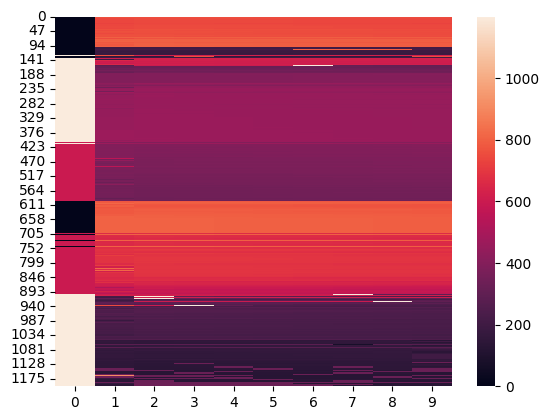

In [58]:
sns.heatmap(Y)

<Axes: >

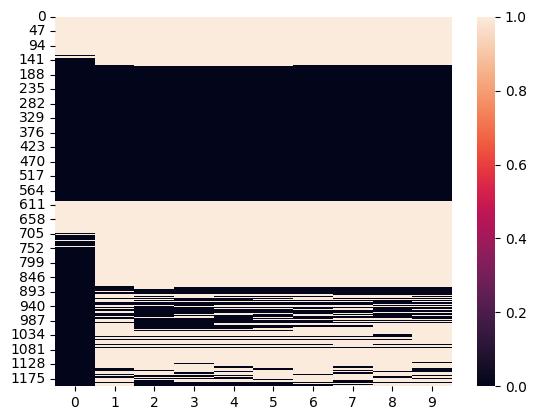

In [59]:
sns.heatmap(paird.take(Y))

/Users/sumner/miniforge3/envs/spot-mark-gene/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


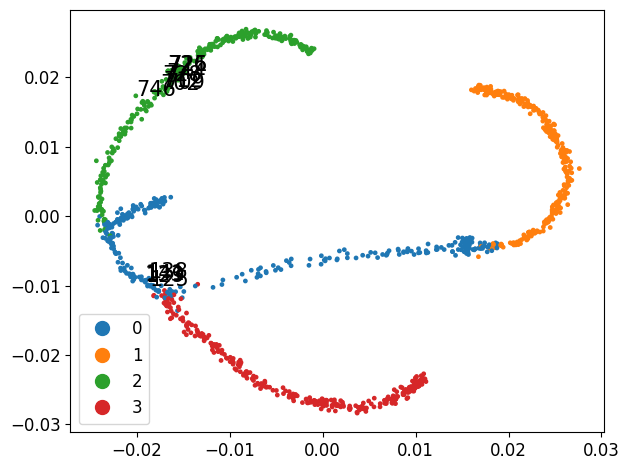

In [60]:
ax = scprep.plot.scatter2d(data_ph, c=branches)
zzz = [611, 893, 1034, 129,940, 0]
zzz = found
# zzz = np.unique(Y.mean(axis=1).round().astype(int))
for ___I, txt in enumerate(zzz):
  coord = zzz[___I]
  ax.annotate(txt, (data_ph[coord][0], data_ph[coord][1]), size=15)